In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading Audio Files

In [2]:
debussy_file = "../../Media/positive_samples/hit_1.mp4"
redhot_file = "../../Media/positive_samples/hit_2.mp4"
duke_file = "../../Media/positive_samples/hit_3.mp4"

In [3]:
ipd.Audio(debussy_file)

In [4]:
ipd.Audio(redhot_file)

In [5]:
ipd.Audio(duke_file)

In [6]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89800/1531559299.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  debussy, sr = librosa.load(debussy_file)
/Users/nadkarnimbp/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89800/1531559299.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  redhot, _ = librosa.load(redhot_file)
/Users/nadkarnimbp/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipyker

## Root-mean-squared energy with Librosa

In [7]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [8]:
rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

## Visualise RMSE + waveform

In [9]:
frames1 = range(len(rms_debussy))
frames2 = range(len(rms_redhot))
frames3 = range(len(rms_duke))

t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)
t3 = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)

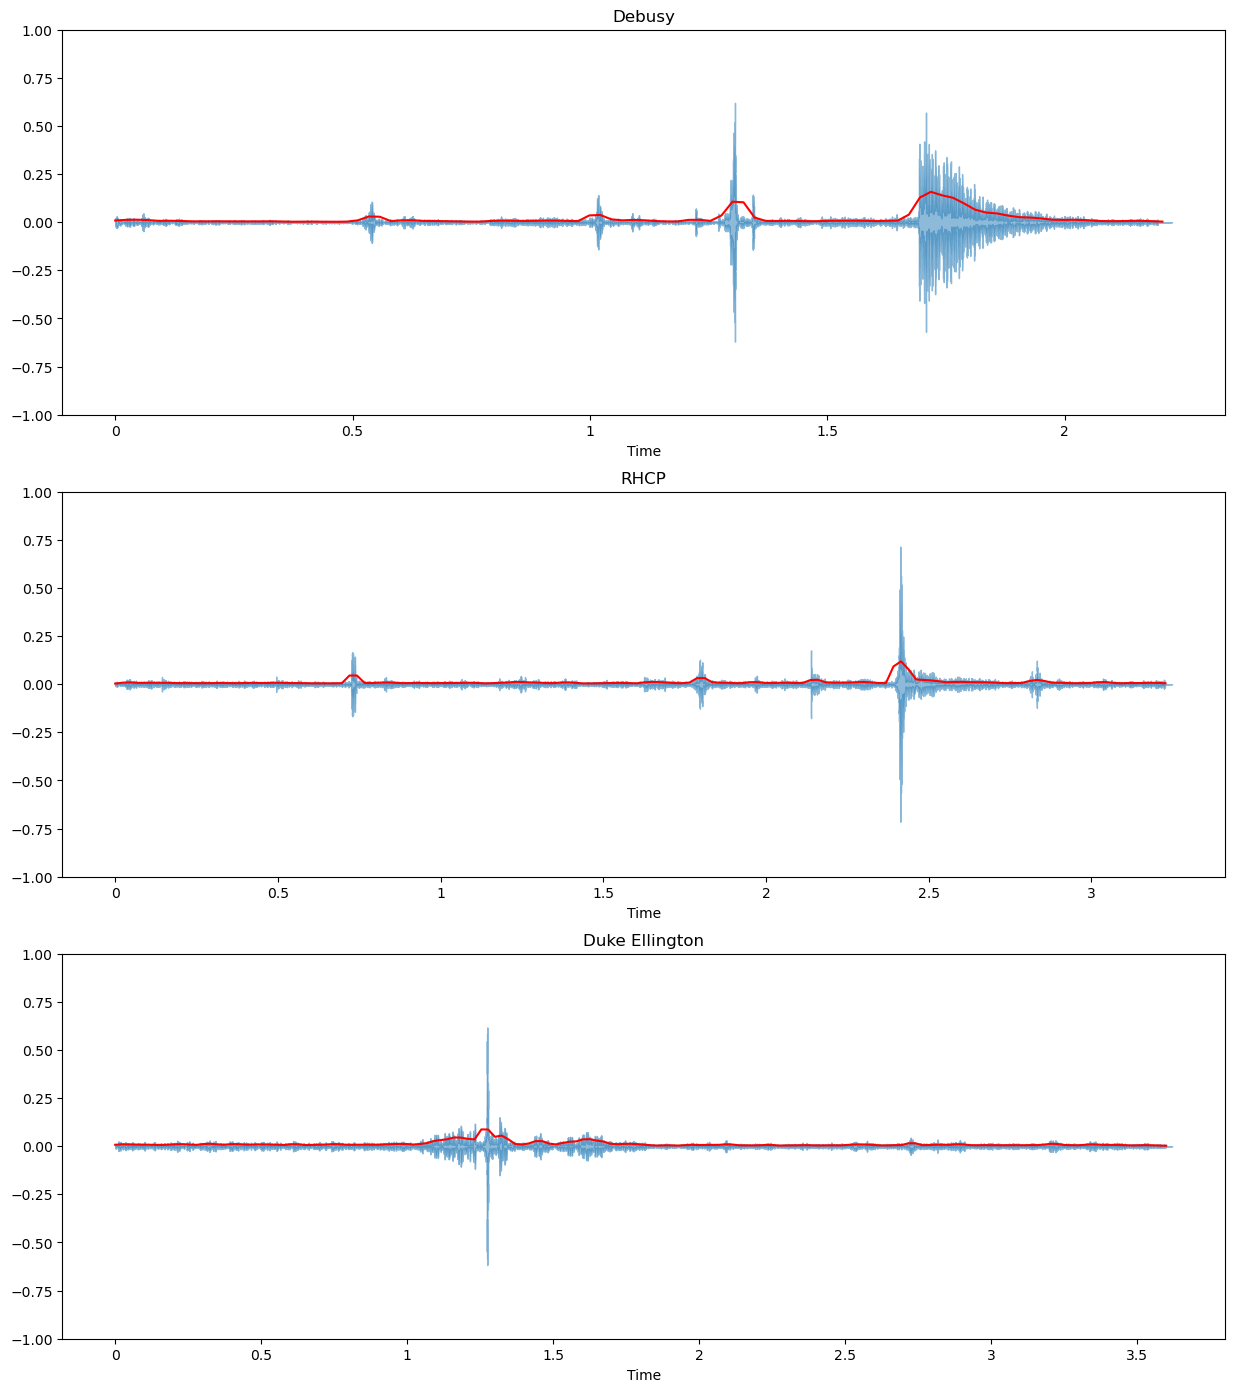

In [10]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## RMSE from scratch

In [11]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)    

In [12]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

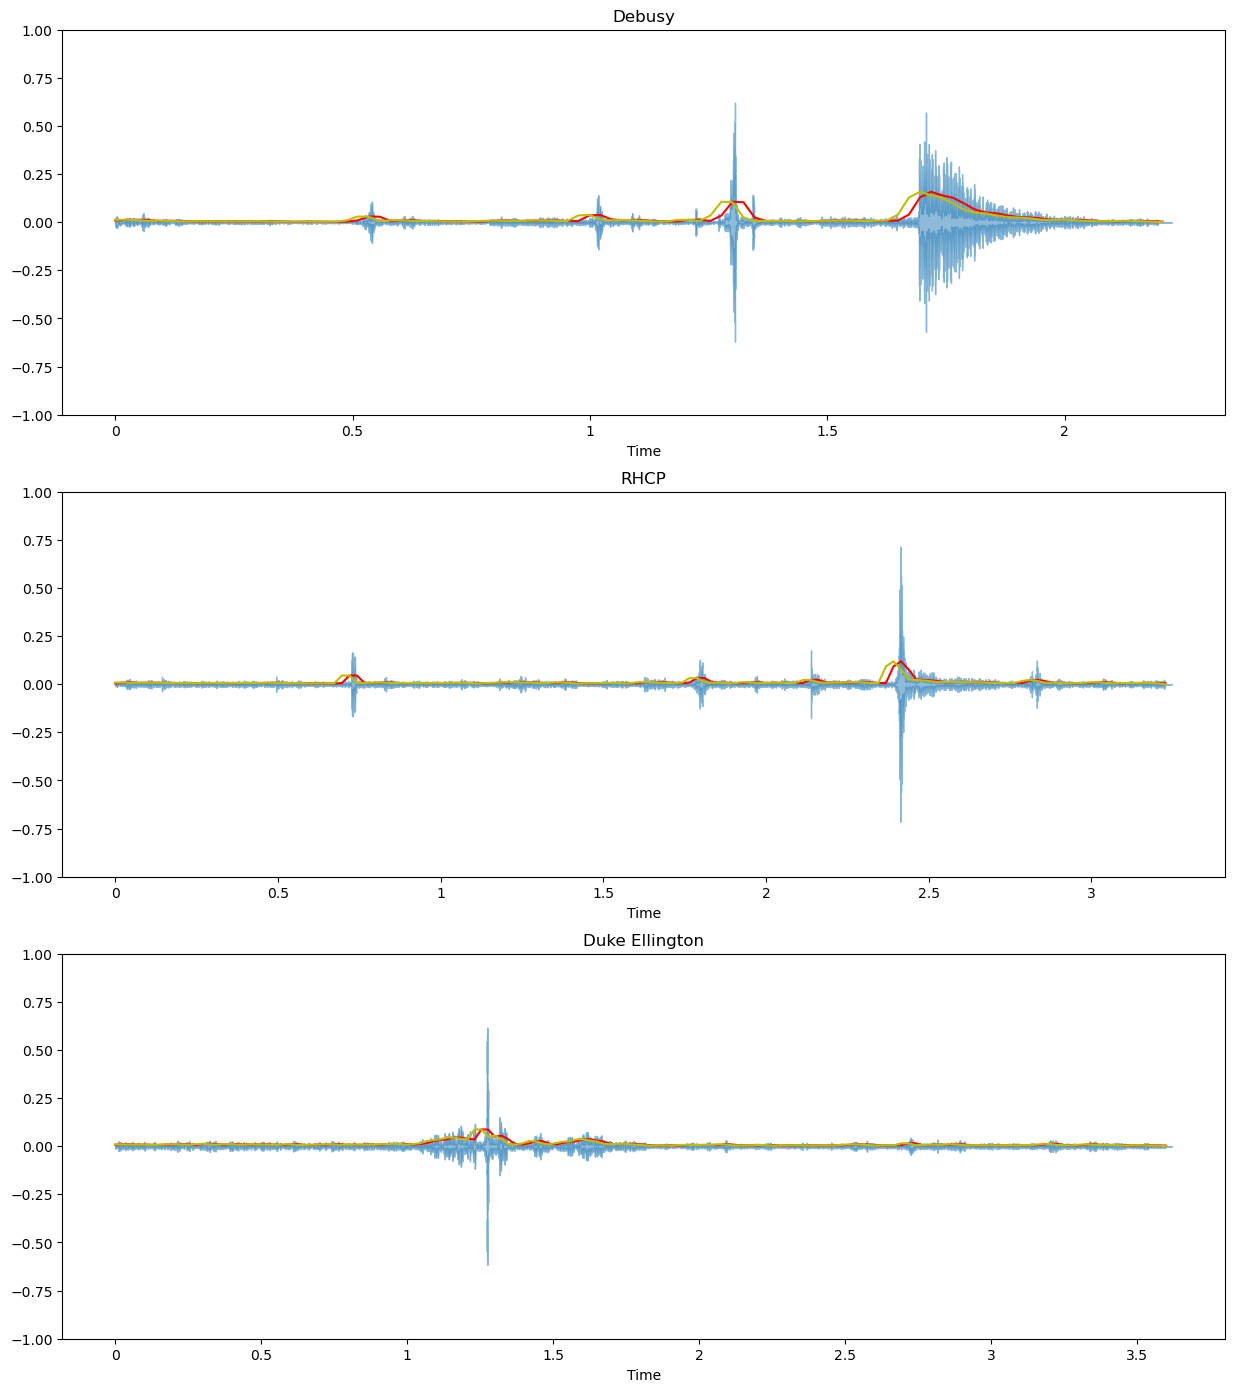

In [13]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, rms_debussy, color="r")
plt.plot(t1, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.plot(t2, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.plot(t3, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Zero-crossing rate with Librosa

In [14]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [15]:
zcr_debussy.size

96

## Visualise zero-crossing rate with Librosa

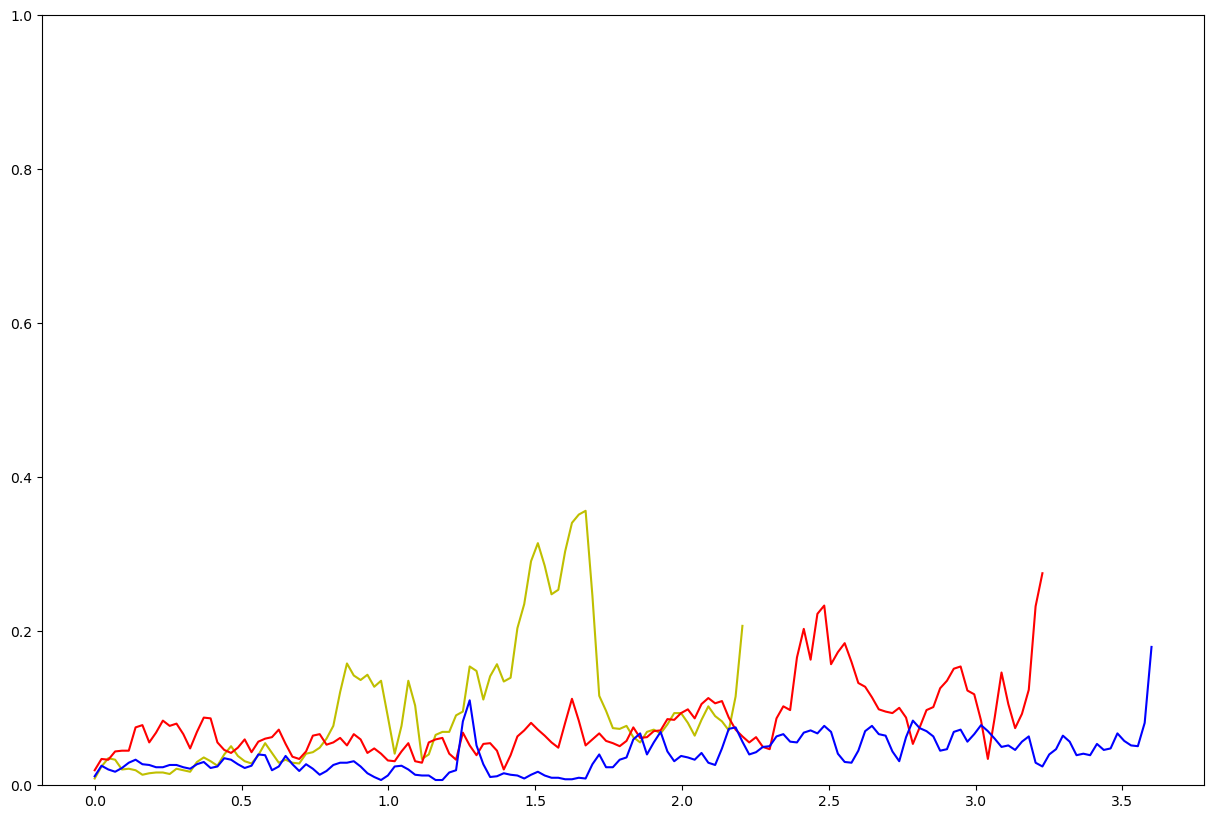

In [16]:
plt.figure(figsize=(15, 10))

plt.plot(t1, zcr_debussy, color="y")
plt.plot(t2, zcr_redhot, color="r")
plt.plot(t3, zcr_duke, color="b")
plt.ylim(0, 1)
plt.show()

## ZCR: Voice vs Noise

In [17]:
voice_file = debussy_file
noise_file = redhot_file

In [18]:
ipd.Audio(voice_file)

In [19]:
ipd.Audio(noise_file)

In [20]:
# load audio files
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89800/2614827100.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  voice, _ = librosa.load(voice_file, duration=15)
/Users/nadkarnimbp/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89800/2614827100.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  noise, _ = librosa.load(noise_file, duration=15)


In [21]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [24]:
frames_1 = range(len(zcr_voice))
frames_2 = range(len(zcr_noise))

t_1 = librosa.frames_to_time(frames_1, hop_length=HOP_LENGTH)
t_2 = librosa.frames_to_time(frames_2, hop_length=HOP_LENGTH)

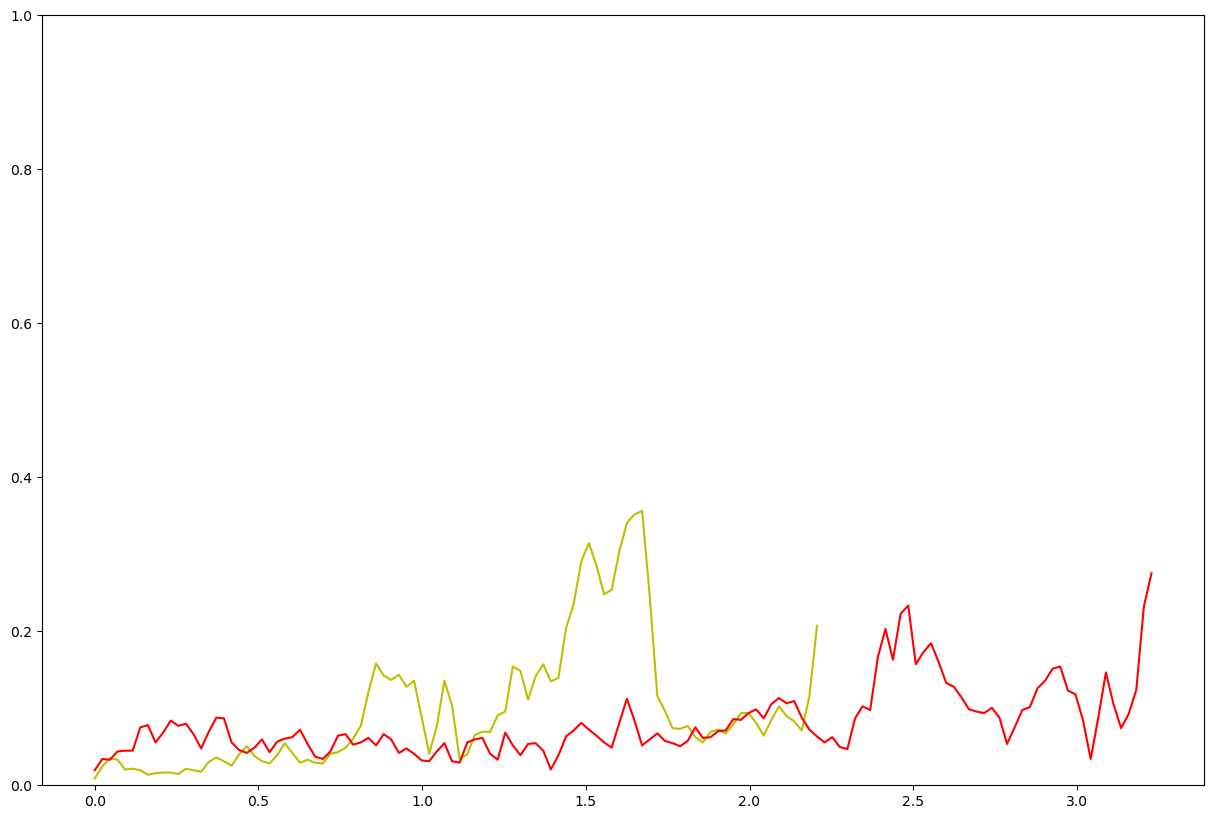

In [25]:
plt.figure(figsize=(15, 10))

plt.plot(t_1, zcr_voice, color="y")
plt.plot(t_2, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()